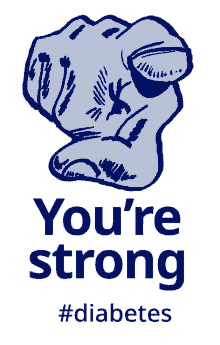

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Number of patients without diabetes: 500
Number of patients with diabetes: 268


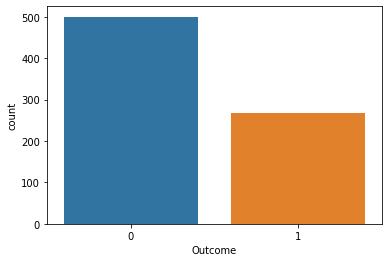

In [6]:
sns.countplot(data=df, x = 'Outcome', label='Count')
LD, NLD = df['Outcome'].value_counts()
print('Number of patients without diabetes: {}'.format(LD))
print('Number of patients with diabetes: {}'.format(NLD))

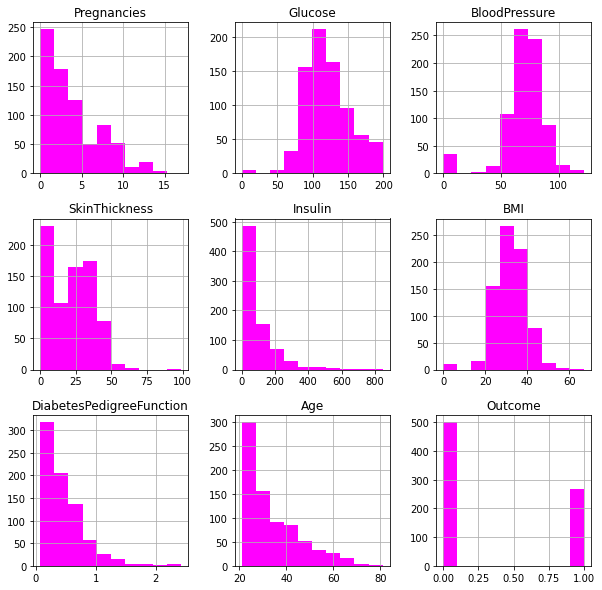

In [7]:
df.hist(figsize = (10,10), color = "magenta")
plt.show() 

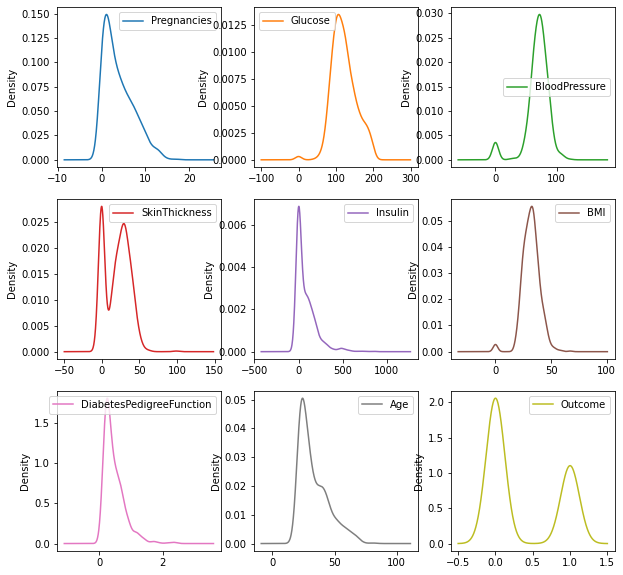

In [8]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize =(10,10))
plt.show()

In [9]:
y = df.Outcome
list = ['Outcome']
x = df.drop(list,axis = 1 )
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

<AxesSubplot:>

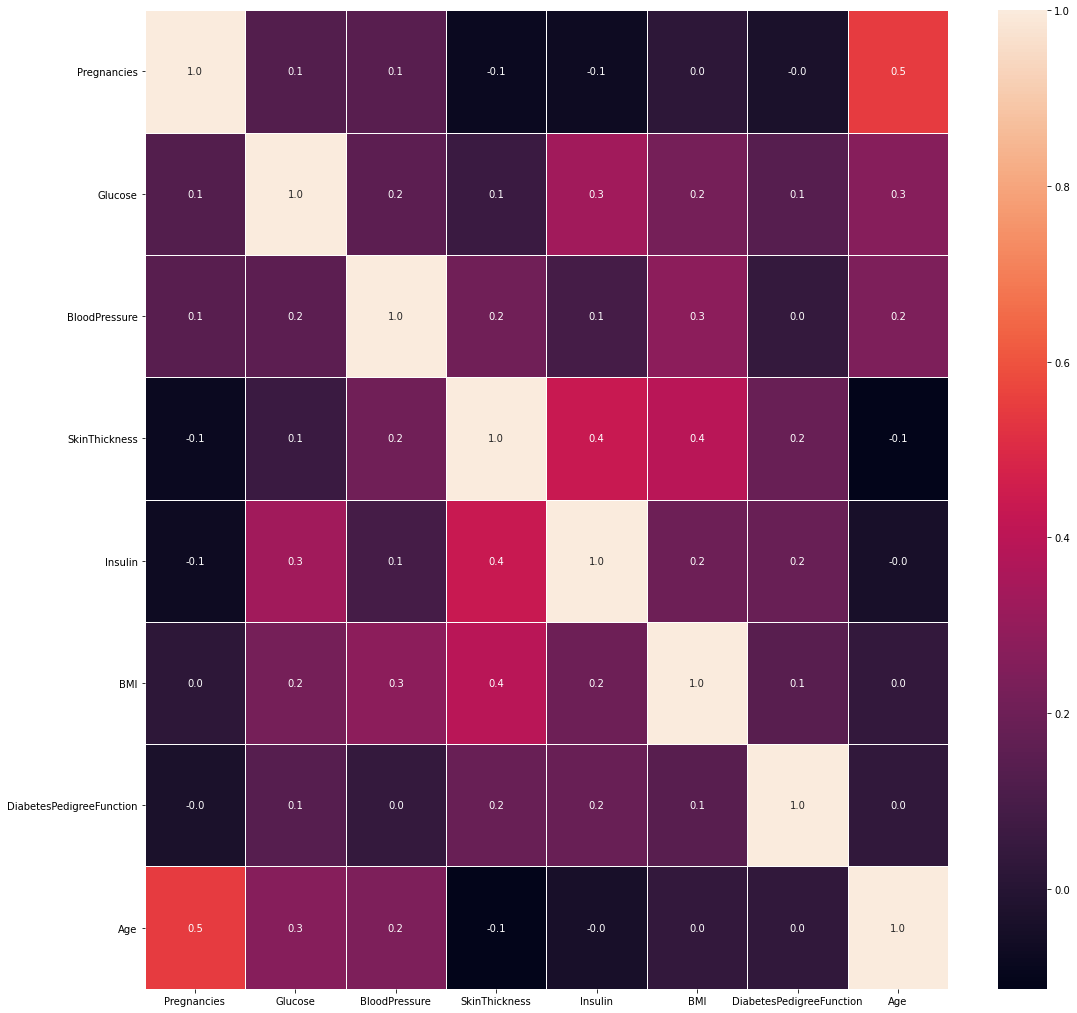

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

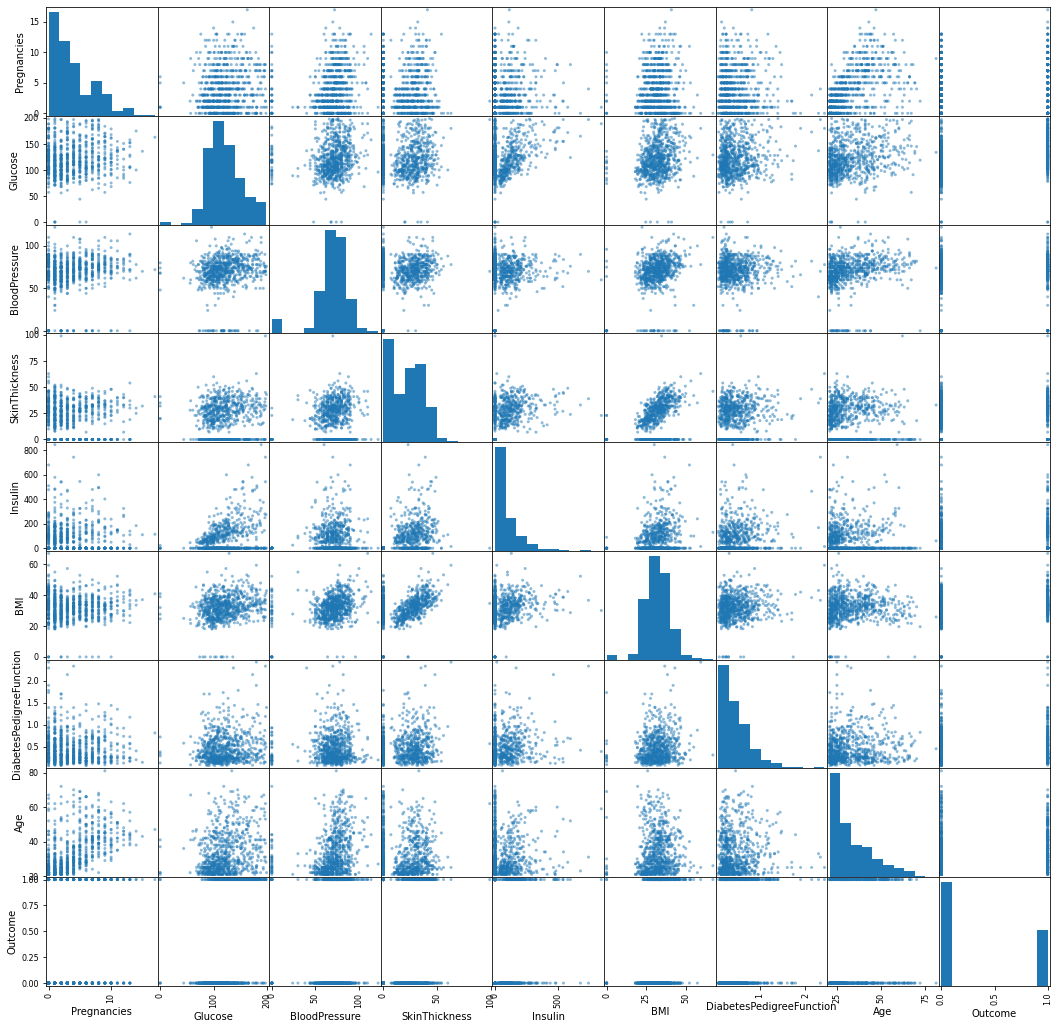

In [11]:
scatter_matrix(df ,figsize = (18,18))
plt.show()

In [12]:
df = pd.read_csv("diabetes.csv")
df['Glucose'].replace(0, np.nan, inplace=True)
df['BloodPressure'].replace(0, np.nan, inplace=True)
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['Insulin'].replace(0, np.nan, inplace=True)
df['BMI'].replace(0, np.nan, inplace=True)
df.drop(['SkinThickness' ,'Insulin'], axis=1, inplace=True)
df = df.dropna(axis=0)

In [13]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome']

df_outcome_1 = df[df['Outcome'] == 1].copy()
i = len(df_outcome_1)
df_outcome_0 = df[df['Outcome'] == 0].sample(i, random_state=1)
df_balanced = df_outcome_0.append(df_outcome_1)
df_balanced = df[cols]

In [14]:
y = df_balanced['Outcome']
X = df_balanced.drop('Outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=43)

In [15]:
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(506, 6), y:(506,)
Shape test set: X:(218, 6), y:(218,)


In [17]:
model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 0.7293577981651376


In [18]:
clf_report = classification_report(y_test, y_pred)
print('                        Classification report')
print("------------------------------------------------------")
print(clf_report)
print("______________________________________________________")

                        Classification report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       143
           1       0.62      0.53      0.58        75

    accuracy                           0.73       218
   macro avg       0.70      0.68      0.69       218
weighted avg       0.72      0.73      0.72       218

______________________________________________________


In [19]:
joblib.dump(model,r"C:\Users\Ananda Rao\Desktop\PERSONAL\HEALTH APPLICATION\SEM PROJECT\diabetes_model.pkl")

['C:\\Users\\Ananda Rao\\Desktop\\PERSONAL\\HEALTH APPLICATION\\SEM PROJECT\\diabetes_model.pkl']